In [1]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install pycaret

In [0]:
# 当前的路径
import os
os.chdir("/content/drive/My Drive/recommention")

In [0]:
import pandas as pd
import numpy as np


In [0]:
# 导入训练集
train_plus = pd.read_csv('trainset_plus.csv')
train_plus['new_score'] = np.log(train_plus['score'].values+1)
print(train_plus[['score', 'new_score']].head())
train_plus.set_index('user', inplace=True)
train_plus.drop(['score'], axis=1,inplace=True)
train_plus.head()

   score  new_score
0     90    4.51086
1     90    4.51086
2     90    4.51086
3     90    4.51086
4     90    4.51086


,ID,ID_Power2,attribute2,attribute1,user_Power2,user_Power2_multiply_ID,user_Power2_multiply_user,ID_multiply_ID_Power2,new_score
user,,,,,,,,,
0,507696,2.577552e+11,272492.800332,288394.873765,0.0,0.0,0.0,1.308613e+17,4.51086
0,137915,1.902055e+10,272492.800332,288394.873765,0.0,0.0,0.0,2.623219e+15,4.51086
0,120328,1.447883e+10,272492.800332,288394.873765,0.0,0.0,0.0,1.742208e+15,4.51086
0,123025,1.513515e+10,272492.800332,288394.873765,0.0,0.0,0.0,1.862002e+15,4.51086
0,131263,1.722998e+10,272492.800332,288394.873765,0.0,0.0,0.0,2.261658e+15,4.51086


In [0]:
train_plus.to_csv('new_score_trainset_plus.csv')

In [0]:
# 导入训练集
test_plus = pd.read_csv('testset_plus.csv')
test_plus['new_score'] = np.log(test_plus['score'].values+1)
print(test_plus[['score', 'new_score']].head())
test_plus.set_index('user', inplace=True)
test_plus.drop(['score'], axis=1,inplace=True)
test_plus.head()

   score  new_score
0     90   4.510860
1     90   4.510860
2     30   3.433987
3     50   3.931826
4     80   4.394449


,ID,ID_Power2,attribute2,attribute1,user_Power2,user_Power2_multiply_ID,user_Power2_multiply_user,ID_multiply_ID_Power2,new_score
user,,,,,,,,,
0,608376,3.701214e+11,272492.800332,288394.873765,0.0,0.0,0.0,2.251730e+17,4.510860
0,175835,3.091795e+10,272492.800332,288394.873765,0.0,0.0,0.0,5.436457e+15,4.510860
0,193714,3.752511e+10,180037.000000,26137.000000,0.0,0.0,0.0,7.269140e+15,3.433987
0,452599,2.048459e+11,272492.800332,288394.873765,0.0,0.0,0.0,9.271303e+16,3.931826
0,147073,2.163047e+10,272492.800332,288394.873765,0.0,0.0,0.0,3.181258e+15,4.394449


In [0]:
test_plus.to_csv('new_score_testset_plus.csv')

In [0]:
# 导入训练集
train = pd.read_csv('trainset.csv')
train.head()

,user,ID,score
0,0,507696,90
1,0,137915,90
2,0,120328,90
3,0,123025,90
4,0,131263,90


In [0]:
train.describe()

,user,ID,score
count,4.008915e+06,4.008915e+06,4.008915e+06
mean,9.605909e+03,3.110291e+05,4.958683e+01
std,5.714924e+03,1.794639e+05,3.822136e+01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.584000e+03,1.564050e+05,0.000000e+00
50%,9.440000e+03,3.071970e+05,5.000000e+01
75%,1.443300e+04,4.677280e+05,9.000000e+01
max,1.983400e+04,6.249600e+05,1.000000e+02


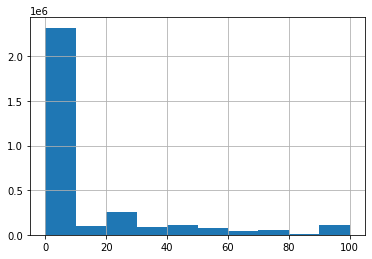

In [0]:
train['score'].diff().hist(range=(0,100))

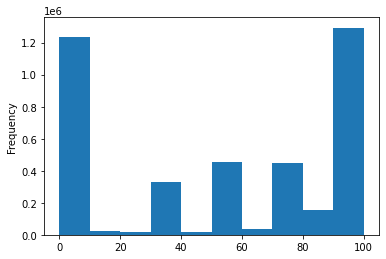

In [0]:
train['score'].plot.hist(range=(0,100))

In [0]:
# 第三步：对收入的数据进行log变化
train['new_score'] = np.log(train['score'].values+1)
print(train[['score', 'new_score']].head())

   score  new_score
0     90    4.51086
1     90    4.51086
2     90    4.51086
3     90    4.51086
4     90    4.51086


In [0]:
a=np.log([2])
a

array([0.69314718])

In [0]:
train.describe()

,user,ID,score,new_score
count,4.008915e+06,4.008915e+06,4.008915e+06,4.008915e+06
mean,9.605909e+03,3.110291e+05,4.958683e+01,2.920119e+00
std,5.714924e+03,1.794639e+05,3.822136e+01,1.973421e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.584000e+03,1.564050e+05,0.000000e+00,0.000000e+00
50%,9.440000e+03,3.071970e+05,5.000000e+01,3.931826e+00
75%,1.443300e+04,4.677280e+05,9.000000e+01,4.510860e+00
max,1.983400e+04,6.249600e+05,1.000000e+02,4.615121e+00


In [0]:
train.drop(['score'], axis=1,inplace=True)


KeyError: ignored

In [0]:
train.head()

,user,ID,new_score
0,0,507696,4.51086
1,0,137915,4.51086
2,0,120328,4.51086
3,0,123025,4.51086
4,0,131263,4.51086


In [0]:
train.describe()

,user,ID,new_score
count,4.008915e+06,4.008915e+06,4.008915e+06
mean,9.605909e+03,3.110291e+05,2.920119e+00
std,5.714924e+03,1.794639e+05,1.973421e+00
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.584000e+03,1.564050e+05,0.000000e+00
50%,9.440000e+03,3.071970e+05,3.931826e+00
75%,1.443300e+04,4.677280e+05,4.510860e+00
max,1.983400e+04,6.249600e+05,4.615121e+00


In [0]:
train.set_index('user', inplace=True)
train.to_csv('new_score_train.csv')

In [0]:
# 导入训练集
train = pd.read_csv('trainset_plus.csv')

In [0]:
# 导入训练集
test = pd.read_csv('testset.csv')
test.head()
# 第三步：对收入的数据进行log变化
test['new_score'] = np.log(test['score'].values+1)
print(test[['score', 'new_score']].head())
test.set_index('user', inplace=True)
# train.to_csv('new_score_train.csv')
test.head()

   score  new_score
0     90   4.510860
1     90   4.510860
2     30   3.433987
3     50   3.931826
4     80   4.394449


,ID,score,new_score
user,,,
0,608376,90,4.510860
0,175835,90,4.510860
0,193714,30,3.433987
0,452599,50,3.931826
0,147073,80,4.394449


In [0]:
test.drop(['score'], axis=1,inplace=True)
test.head()

,ID,new_score
user,,
0,608376,4.510860
0,175835,4.510860
0,193714,3.433987
0,452599,3.931826
0,147073,4.394449


In [0]:
test.to_csv('new_score_testset.csv')

# 分类

In [0]:
# import classification module
from pycaret.classification import *

In [0]:
#intialize the setup
classificate = setup(data = train, target='score', train_size=0.8)

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:20:38
Status,. . . . . . . . . . . . . . . . . .,Fitting Model on 90% sample
ETC,. . . . . . . . . . . . . . . . . .,11.41 Minutes Remaining


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
user,Numeric
ID,Numeric
score,Label
ID_Power2,Numeric
attribute2,Numeric
attribute1,Numeric
user_Power2,Numeric
user_Power2_multiply_ID,Numeric
user_Power2_multiply_user,Numeric
ID_multiply_ID_Power2,Numeric


In [0]:
compare_models()

In [0]:
# create models for stacking
dt = create_model('dt')
rf = create_model('rf')
ada = create_model('ada')
ridge = create_model('ridge')
knn = create_model('knn')
# stack trained models
stacked_models = stack_models(estimator_list=[dt,rf,ada,ridge,knn])

In [0]:
#create models for stacknet
dt = create_model('dt')
rf = create_model('rf')
ada = create_model('ada')
ridge = create_model('ridge')
knn = create_model('knn')
#create stacknet
stacknet = create_stacknet(estimator_list =[[dt,rf],[ada,ridge,knn]])

In [0]:
#save trained model
save_model(lr, 'lr_model_23122019')

# 回归

In [5]:
new_train = pd.read_csv('new_score_trainset_plus.csv')
new_train.head()

,user,ID,ID_Power2,attribute2,attribute1,user_Power2,user_Power2_multiply_ID,user_Power2_multiply_user,ID_multiply_ID_Power2,new_score
0,0,507696,2.577552e+11,272492.800332,288394.873765,0.0,0.0,0.0,1.308613e+17,4.51086
1,0,137915,1.902055e+10,272492.800332,288394.873765,0.0,0.0,0.0,2.623219e+15,4.51086
2,0,120328,1.447883e+10,272492.800332,288394.873765,0.0,0.0,0.0,1.742208e+15,4.51086
3,0,123025,1.513515e+10,272492.800332,288394.873765,0.0,0.0,0.0,1.862002e+15,4.51086
4,0,131263,1.722998e+10,272492.800332,288394.873765,0.0,0.0,0.0,2.261658e+15,4.51086


In [0]:
# import classification module
from pycaret.regression import *

In [14]:
# intialize the setup
reg1 = setup(data = new_train, target='new_score', train_size=0.8)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6862
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(4008915, 10)"
4,Missing Values,False
5,Numeric Features,9
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [0]:
compare_models(fold=3, sort='RMSE')

IntProgress(value=0, description='Processing: ', max=91)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:13:03
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 3
Estimator,. . . . . . . . . . . . . . . . . .,TheilSen Regressor
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.7964,3.889700e+00,1.9722,9.000000e-04,0.7948,0.3040
1,Lasso Regression,1.7965,3.889700e+00,1.9722,9.000000e-04,0.7948,0.3040
2,Ridge Regression,1.7964,3.889700e+00,1.9722,9.000000e-04,0.7948,0.3040
3,Elastic Net,1.7965,3.889700e+00,1.9722,9.000000e-04,0.7948,0.3040
4,Bayesian Ridge,1.7964,3.889700e+00,1.9722,9.000000e-04,0.7948,0.3040
5,Orthogonal Matching Pursuit,1.7978,3.892600e+00,1.9730,2.000000e-04,0.7950,0.3042
6,Lasso Least Angle Regression,1.7981,3.893200e+00,1.9731,-0.000000e+00,0.7951,0.3043
7,Least Angle Regression,1.7963,3.920400e+00,1.9800,-7.000000e-03,0.7957,0.3041
8,Random Sample Consensus,1.6402,4.071300e+00,2.0177,-4.570000e-02,0.8298,0.2067
9,Passive Aggressive Regressor,95516.2122,3.698559e+10,148845.3162,-9.513478e+09,8.6746,22932.8074


In [11]:
rf = create_model('rf', fold=3)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:33:58
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 3
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


KeyboardInterrupt: ignored

In [15]:
lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6936,3.6102,1.9000,0.0732,0.7704,0.2871
1,1.7037,3.6301,1.9053,0.0685,0.7729,0.2888
2,1.6995,3.6158,1.9015,0.0707,0.7711,0.2884
Mean,1.6989,3.6187,1.9023,0.0708,0.7715,0.2881
SD,0.0042,0.0084,0.0022,0.0019,0.0010,0.0007


In [29]:
# 优化lightgbm
tuned_lightgbm = tune_model(['lightgbm','catboost'], fold=3, n_iter=10,optimize='accuracy', method='Boosting',ensemble=True, verbose=True)

SystemExit: ignored

In [31]:
tuned_lightgbm = tune_model('lightgbm', fold=3, n_iter=10, verbose=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6560,3.5416,1.8819,0.0908,0.7623,0.2817
1,1.6621,3.5543,1.8853,0.0880,0.7639,0.2828
2,1.6610,3.5450,1.8828,0.0889,0.7627,0.2830
Mean,1.6597,3.5470,1.8833,0.0892,0.7630,0.2825
SD,0.0026,0.0053,0.0014,0.0012,0.0007,0.0006


In [32]:
knn = create_model('knn', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7409,4.3951,2.0964,-0.1283,0.8084,0.3044
1,1.7423,4.4003,2.0977,-0.1291,0.8086,0.3052
2,1.7403,4.3907,2.0954,-0.1285,0.8077,0.3044
Mean,1.7412,4.3954,2.0965,-0.1286,0.8082,0.3046
SD,0.0008,0.0040,0.0009,0.0003,0.0004,0.0004


In [0]:
gbc = create_model('et', fold=3)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:50:46
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 3
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [0]:
catboost = create_model('catboost', fold=3)

In [0]:
# creating multiple models for multiple layer stacking
catboost = create_model('catboost')
et = create_model('et')
lightgbm = create_model('lightgbm')
xgboost = create_model('xgboost')
ada = create_model('ada')
rf = create_model('rf')
gbr = create_model('gbr')
# creating multiple layer stacking from specific models
stacknet = create_stacknet([[lightgbm, xgboost, ada], [et, gbr, catboost, rf]])

In [0]:
#save trained model
save_model(lr, 'lr_model_23122019')

In [16]:
new_test = pd.read_csv('new_score_testset_plus.csv')
new_train.head()

,user,ID,ID_Power2,attribute2,attribute1,user_Power2,user_Power2_multiply_ID,user_Power2_multiply_user,ID_multiply_ID_Power2,new_score
0,0,507696,2.577552e+11,272492.800332,288394.873765,0.0,0.0,0.0,1.308613e+17,4.51086
1,0,137915,1.902055e+10,272492.800332,288394.873765,0.0,0.0,0.0,2.623219e+15,4.51086
2,0,120328,1.447883e+10,272492.800332,288394.873765,0.0,0.0,0.0,1.742208e+15,4.51086
3,0,123025,1.513515e+10,272492.800332,288394.873765,0.0,0.0,0.0,1.862002e+15,4.51086
4,0,131263,1.722998e+10,272492.800332,288394.873765,0.0,0.0,0.0,2.261658e+15,4.51086


In [0]:
test_score = new_test['new_score'].tolist()

In [0]:
new_test.drop('new_score',axis=1, inplace=True)

In [0]:
# generate predictions on unseen data
pred = predict_model(lightgbm, data = new_test)

In [20]:
pred.head()

,user,ID,ID_Power2,attribute2,attribute1,user_Power2,user_Power2_multiply_ID,user_Power2_multiply_user,ID_multiply_ID_Power2,Label
0,0,608376,3.701214e+11,272492.800332,288394.873765,0.0,0.0,0.0,2.251730e+17,2.9141
1,0,175835,3.091795e+10,272492.800332,288394.873765,0.0,0.0,0.0,5.436457e+15,2.9902
2,0,193714,3.752511e+10,180037.000000,26137.000000,0.0,0.0,0.0,7.269140e+15,2.8921
3,0,452599,2.048459e+11,272492.800332,288394.873765,0.0,0.0,0.0,9.271303e+16,2.8808
4,0,147073,2.163047e+10,272492.800332,288394.873765,0.0,0.0,0.0,3.181258e+15,3.1975


In [0]:
# 从log转到原来的数据
pred_score = np.exp(pred['Label'].tolist())+1

In [24]:
from sklearn.metrics import mean_squared_error
# 计算rmse
rmse = np.sqrt(mean_squared_error(test_score,pred_score))
rmse

19.08495144841196